In [151]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [152]:
X, y = make_classification(n_samples=50000, n_features=11, n_informative=11, n_redundant=0, n_clusters_per_class=1, n_classes=10, random_state=42)

In [153]:
df = pd.DataFrame(X, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
df['quality'] = y

In [154]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.135428,0.022957,-0.859987,-1.914723,-0.755849,-3.974395,2.705867,1.519474,-1.801757,2.626007,0.293269,1
1,-2.421290,2.304533,-2.916852,1.775244,0.680650,1.835830,-0.384676,-1.310471,-1.128382,0.659783,0.360420,0
2,-1.342147,-2.713764,-3.066763,1.279014,3.930891,0.683757,0.540418,3.095344,-2.178153,-0.259510,0.136298,7
3,2.635085,3.126342,1.736001,3.902437,3.230380,-1.592174,-3.954798,-0.158770,0.148889,6.441075,-0.384098,6
4,-1.912999,0.763131,0.650817,-4.307829,-0.373689,2.510370,1.696082,2.482520,0.130570,-3.258717,0.488569,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.611574,1.681701,2.813174,-2.303899,-2.102586,-1.594775,-4.289627,-4.522783,-0.324901,-0.695703,0.255930,7
49996,-3.639380,-1.325727,-0.695030,1.174747,0.017017,2.362717,-2.635369,-0.748089,0.237375,0.930982,-2.497822,7
49997,1.807696,-2.454488,-2.230462,0.173196,1.393919,2.983844,-0.883324,-0.495242,2.682251,2.839134,3.658257,6
49998,-0.560963,2.172927,-0.924256,-1.172709,2.157484,3.133567,0.551861,0.218004,1.060667,3.699764,-0.499112,8


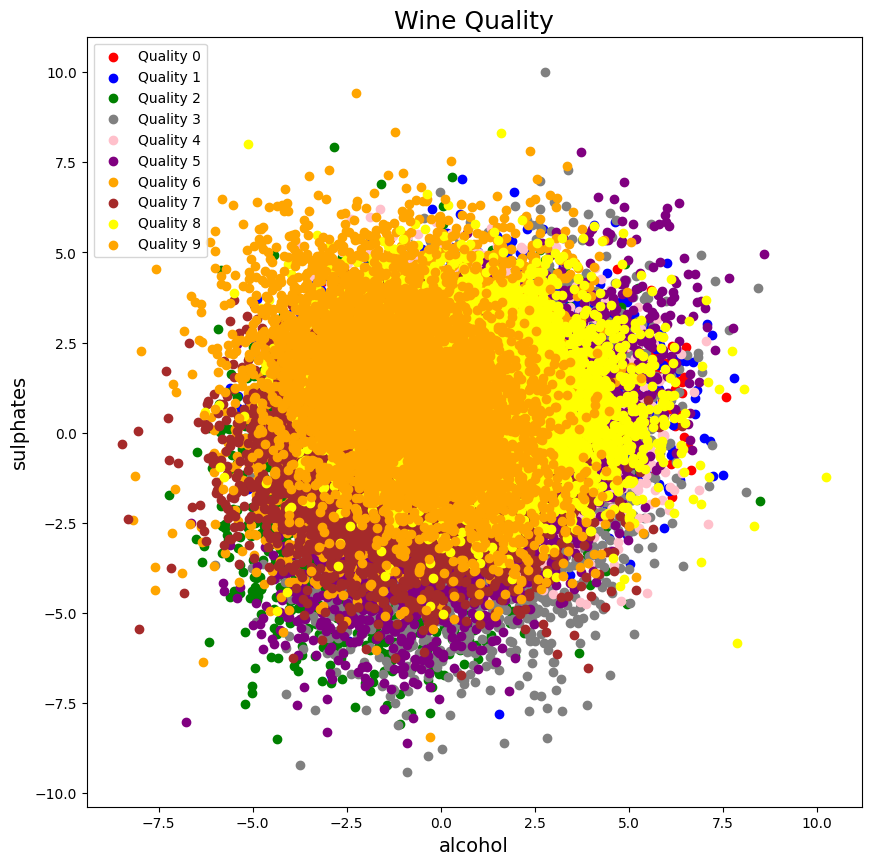

In [155]:
colors = ['red', 'blue', 'green', 'grey', 'pink',  'purple', 'orange', 'brown', 'yellow', 'orange']
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(df["alcohol"][df["quality"] == i],
                df["sulphates"][df["quality"] == i],
                c=colors[i], label=f"Quality {i}")
plt.title("Wine Quality", fontsize=18)
plt.xlabel("alcohol", fontsize=14)
plt.ylabel("sulphates", fontsize=14)
plt.legend()
plt.show()


## Division del conjunto de datos

In [156]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"], test_size=0.1)

## Entrenamiento del algoritmo

In [157]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [158]:

clf.coef_.shape

(10, 11)

In [159]:
clf.coef_ # weights

array([[ -5.28154816,   2.48876471,  -2.79727879,  -3.16173073,
          2.23689807,   4.45093607,  -5.28229438,   2.79031312,
         -6.01426588,   7.01759278,  -4.6155777 ],
       [ -2.32043943,  -7.69722169,   5.33621106,   0.55593772,
         -5.19574098,  -8.13848817,   3.71882116,   3.417365  ,
         -3.73455394,   0.43029899,   3.45257681],
       [  3.74593962,   6.15134626,   0.14045854,   5.0980907 ,
        -16.90017594,   2.45822843,   0.81901157,   5.0201506 ,
          4.66122594,  -7.29090071,  -5.66450424],
       [  3.81749715,  -7.58229801,   1.05242718,  -4.04527181,
         -7.80040564,  14.64437091,  -2.40599701,  11.6083179 ,
         -0.62417822, -13.63051172,   6.24034125],
       [  9.74664064,  -3.48594831,   2.60301301,  -8.84370935,
          6.02600798, -12.66902434,   0.53911101,  -6.50076896,
          0.86624395,   1.89196093,   4.90701468],
       [ -6.23666254,   2.12747036,  -2.1857659 , -10.39952161,
          5.74807836,   3.81586848,  13.6

In [160]:
clf.intercept_ # valor del bias

array([-52., -45., -67., -64., -55., -55., -57., -66., -57., -39.])

## Prediccion con el conjunto de pruebas

In [161]:
y_pred = clf.predict(X_test)

In [162]:
len(y_pred)

5000

In [163]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="micro")

np.float64(0.4236)